In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from keras.regularizers import l2
from keras.layers import Activation
from sklearn import metrics
from sklearn.metrics import r2_score
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.utils import shuffle 
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [20]:
df = pd.read_csv("airquality.csv",encoding='utf-8')
df

/home/gh555657/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
0,1,二林,彰化縣,88.0,細懸浮微粒,普通,4.2,0.3,0.3,46,...,103.0,37.0,8.4,9.7,1.4,2.3,293.0,2017/1/7 13:00,81.0,31.0
1,2,三重,新北市,52.0,懸浮微粒,普通,5.7,1.98,1.8,-,...,79.0,18.0,50.0,125.0,75.0,NaN,NaN,2017/1/7 13:00,56.0,14.0
2,3,三義,苗栗縣,78.0,細懸浮微粒,普通,3.3,0.32,0.4,34,...,64.0,36.0,11.0,16.0,4.8,3.3,193.0,2017/1/7 13:00,53.0,26.0
3,4,土城,新北市,81.0,細懸浮微粒,普通,3.7,0.46,0.7,51,...,60.0,42.0,17.0,21.0,4.0,2.0,201.0,2017/1/7 13:00,44.0,28.0
4,5,士林,臺北市,40.0,NaN,良好,3.7,0.43,0.4,45,...,25.0,22.0,16.0,20.0,4.2,1.8,289.0,2017/1/7 13:00,20.0,12.0
5,6,大同,臺北市,43.0,NaN,良好,3.6,1.23,1.3,-,...,55.0,23.0,37.0,55.0,18.0,NaN,NaN,2017/1/7 13:00,37.0,13.0
6,8,大園,桃園市,68.0,細懸浮微粒,普通,9.6,0.38,0.5,30,...,54.0,23.0,21.0,24.0,3.6,2.0,295.0,2017/1/7 13:00,59.0,23.0
7,9,大寮,高雄市,134.0,細懸浮微粒,對敏感族群不良,7.4,0.37,0.5,43,...,47.0,26.0,21.0,26.0,5.6,2.6,287.0,2017/1/7 13:00,83.0,48.0
8,10,小港,高雄市,154.0,細懸浮微粒,對所有族群不良,18.0,0.42,0.6,33,...,69.0,52.0,40.0,49.0,9.0,2.6,273.0,2017/1/7 13:00,92.0,61.0
9,11,中山,臺北市,50.0,NaN,良好,3.8,0.89,0.8,34,...,42.0,23.0,34.0,46.0,12.0,1.6,5.7,2017/1/7 13:00,26.0,15.0


In [21]:
Dadu = df['SiteName'].isin(['大肚']) #找大肚測站

df[Dadu]

,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
460343,461638,大肚,臺中市,22.0,懸浮微粒,良好,3.1,NaN,NaN,19,...,24.0,3.0,6.0,NaN,NaN,NaN,NaN,2017/10/12 22:00,NaN,NaN
460432,461727,大肚,臺中市,20.0,懸浮微粒,良好,3.1,NaN,NaN,17,...,22.0,3.0,4.1,NaN,NaN,NaN,NaN,2017/10/12 23:00,NaN,NaN
460445,461740,大肚,臺中市,19.0,懸浮微粒,良好,3.3,NaN,NaN,16,...,21.0,2.0,5.1,NaN,NaN,NaN,NaN,2017/10/13 00:00,NaN,NaN
460534,461829,大肚,臺中市,19.0,懸浮微粒,良好,3.3,NaN,NaN,17,...,21.0,2.0,3.4,NaN,NaN,NaN,NaN,2017/10/13 01:00,NaN,NaN
460648,461943,大肚,臺中市,19.0,懸浮微粒,良好,3.3,NaN,NaN,18,...,20.0,2.0,2.9,NaN,NaN,NaN,NaN,2017/10/13 02:00,NaN,NaN
460788,462083,大肚,臺中市,20.0,懸浮微粒,良好,3.3,NaN,NaN,19,...,22.0,3.0,3.1,NaN,NaN,NaN,NaN,2017/10/13 03:00,NaN,NaN
460877,462172,大肚,臺中市,20.0,懸浮微粒,良好,3.3,NaN,NaN,22,...,22.0,3.0,3.0,NaN,NaN,NaN,NaN,2017/10/13 04:00,NaN,NaN
461194,462489,大肚,臺中市,26.0,臭氧,良好,3.5,NaN,NaN,28,...,26.0,4.0,6.3,NaN,NaN,NaN,NaN,2017/10/13 08:00,NaN,NaN
461283,462578,大肚,臺中市,28.0,臭氧,良好,3.8,NaN,NaN,30,...,26.0,4.0,7.0,NaN,NaN,NaN,NaN,2017/10/13 09:00,NaN,NaN
461372,462667,大肚,臺中市,30.0,臭氧,良好,3.8,NaN,NaN,32,...,27.0,5.0,5.7,NaN,NaN,NaN,NaN,2017/10/13 10:00,NaN,NaN


In [22]:
Dadu = df['SiteName'].isin(['大肚']) #找大肚測站
Dadu=df[Dadu].drop(columns=['O3','CO','SiteName','AQI','id','Country','Pollutant','Status','CO_8hr','O3_8hr','NOx','WindSpeed','WindDirec','PublishTime','PM10_AVG','PM25_AVG','NO']).reset_index(drop=True)
#只留下SiteName PM25 column
Dadu.drop([0, 1],inplace=True)
Dadu.reset_index(drop=True,inplace=True)
Dadu['pr']=''

Dadu

,SO2,PM10,PM25,NO2,pr
0,3.3,21.0,2.0,5.1,
1,3.3,21.0,2.0,3.4,
2,3.3,20.0,2.0,2.9,
3,3.3,22.0,3.0,3.1,
4,3.3,22.0,3.0,3.0,
5,3.5,26.0,4.0,6.3,
6,3.8,26.0,4.0,7.0,
7,3.8,27.0,5.0,5.7,
8,3.9,28.0,6.0,6.3,
9,4.0,30.0,7.0,6.0,


In [23]:
cd4 = Dadu['SO2']>25
Dadu[cd4] #輸出整筆資料

,SO2,PM10,PM25,NO2,pr
2283,40.5,60.0,34.0,27.2,
2284,29.5,60.0,34.0,21.5,
2307,42.1,78.0,37.0,17.9,
2308,30.5,78.0,37.0,19.4,


In [24]:
Dadu.replace({0:np.nan,0.0:np.nan}, inplace=True) #將0全部改為空值


Dadu

,SO2,PM10,PM25,NO2,pr
0,3.3,21.0,2.0,5.1,
1,3.3,21.0,2.0,3.4,
2,3.3,20.0,2.0,2.9,
3,3.3,22.0,3.0,3.1,
4,3.3,22.0,3.0,3.0,
5,3.5,26.0,4.0,6.3,
6,3.8,26.0,4.0,7.0,
7,3.8,27.0,5.0,5.7,
8,3.9,28.0,6.0,6.3,
9,4.0,30.0,7.0,6.0,


In [25]:
Dadu.fillna(method='ffill', inplace=True) #以前面數字來取代0值


Dadu

,SO2,PM10,PM25,NO2,pr
0,3.3,21.0,2.0,5.1,
1,3.3,21.0,2.0,3.4,
2,3.3,20.0,2.0,2.9,
3,3.3,22.0,3.0,3.1,
4,3.3,22.0,3.0,3.0,
5,3.5,26.0,4.0,6.3,
6,3.8,26.0,4.0,7.0,
7,3.8,27.0,5.0,5.7,
8,3.9,28.0,6.0,6.3,
9,4.0,30.0,7.0,6.0,


In [26]:
cd4 = Dadu['PM25'].isin([0])
Dadu[cd4] #輸出整筆資料

,SO2,PM10,PM25,NO2,pr


In [27]:
Dadu.to_csv('Dadupollution.csv')

Dadu

,SO2,PM10,PM25,NO2,pr
0,3.3,21.0,2.0,5.1,
1,3.3,21.0,2.0,3.4,
2,3.3,20.0,2.0,2.9,
3,3.3,22.0,3.0,3.1,
4,3.3,22.0,3.0,3.0,
5,3.5,26.0,4.0,6.3,
6,3.8,26.0,4.0,7.0,
7,3.8,27.0,5.0,5.7,
8,3.9,28.0,6.0,6.3,
9,4.0,30.0,7.0,6.0,


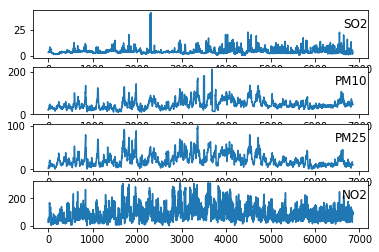

In [28]:
# load dataset
dataset =pd.read_csv('Dadupollution.csv',header=0,index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,3] = encoder.fit_transform(values[:,3])
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1,2, 3]
i=1
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[0:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [29]:
dataset

,SO2,PM10,PM25,NO2,pr
0,3.3,21.0,2.0,41.0,NaN
1,3.3,21.0,2.0,27.0,NaN
2,3.3,20.0,2.0,23.0,NaN
3,3.3,22.0,3.0,25.0,NaN
4,3.3,22.0,3.0,24.0,NaN
5,3.5,26.0,4.0,51.0,NaN
6,3.8,26.0,4.0,56.0,NaN
7,3.8,27.0,5.0,46.0,NaN
8,3.9,28.0,6.0,51.0,NaN
9,4.0,30.0,7.0,48.0,NaN


In [30]:
#z-score 函式 - sklearn version
from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #z-scaler物件
train_set_scaled = pd.DataFrame(scale.fit_transform(dataset),
                                columns=dataset.keys())
train_set_scaled['pr']=dataset['PM25']

train_set_scaled

/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,SO2,PM10,PM25,NO2,pr
0,-0.431431,-1.160853,-1.376620,-0.893510,2.0
1,-0.431431,-1.160853,-1.376620,-1.152727,2.0
2,-0.431431,-1.203861,-1.376620,-1.226789,2.0
3,-0.431431,-1.117845,-1.308096,-1.189758,3.0
4,-0.431431,-1.117845,-1.308096,-1.208274,3.0
5,-0.339238,-0.945813,-1.239571,-0.708355,4.0
6,-0.200949,-0.945813,-1.239571,-0.615778,4.0
7,-0.200949,-0.902805,-1.171047,-0.800933,5.0
8,-0.154853,-0.859797,-1.102523,-0.708355,6.0
9,-0.108756,-0.773781,-1.033998,-0.763902,7.0


In [31]:
def train_window(df,ref_hr=66,pr_hr=6):
    X_train,Y_train=[],[]
    for i in range(df.shape[0]-pr_hr-ref_hr): 
        X_train.append(np.array(df.iloc[i:i+ref_hr,:-1])) 
        Y_train.append(np.array(df.iloc[i+ref_hr:i+ref_hr+pr_hr]["pr"]))
#        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day]["var1(t)"]))
        #选取标签为A和C的列，并且选完类型还是dataframe df.iloc 指定行數 EX: df = df.iloc[:, [0, 2]] 
        #"，"前面的"："表示选取整列，第二个示例中的的0:2表示选取第0行到第二行，这里的0:2相当于[0,2）前闭后开，2是不在范围之内的。 
        #需要注意的是，如果是df = df.loc[0:2, ['A', 'C']]或者df = df.loc[0:2, ['A', 'C']]，切片之后类型依旧是dataframe，不能直接进行
    return np.array(X_train), np.array(Y_train) 




In [32]:
'''
#將次序打亂 資料亂序 將資料打散，而非照日期排序
def shuffle(X,Y):
    np.random.seed(10)
    randomList = np.arange(X.shape[0])
    np.random.shuffle(randomList)
    return X[randomList], Y[randomList]
'''

'\n#將次序打亂 資料亂序 將資料打散，而非照日期排序\ndef shuffle(X,Y):\n    np.random.seed(10)\n    randomList = np.arange(X.shape[0])\n    np.random.shuffle(randomList)\n    return X[randomList], Y[randomList]\n'

In [33]:
#Training data & Validation data
#將Training Data取一部份當作Validation Data
def splitData(X,Y,rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val

In [34]:
#合併輸出
#將次序打亂 資料亂序 將資料打散，而非照日期排序
from sklearn.utils import shuffle 

# build Data, use last 23 hours to predict next 1 hours
X_train,Y_train=train_window(train_set_scaled,12,7)

# shuffle the data, and random seed is 10
X_train, Y_train = shuffle(X_train, Y_train)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)

# from 2 dimmension to 3 dimension
#Y_train = Y_train[:,:,np.newaxis]
#Y_val = Y_val[:,:,np.newaxis]

In [35]:
#X_train.shape

/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  after removing the cwd from sys.path.
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, input_shape=(12, 4))`
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                17664     
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 903       
__________

5532/5532 [==============================] - 2s 275us/step - loss: 46.9547 - val_loss: 24.8178
Epoch 64/500
5532/5532 [==============================] - 2s 287us/step - loss: 46.7952 - val_loss: 24.1866
Epoch 65/500
5532/5532 [==============================] - 1s 256us/step - loss: 46.1181 - val_loss: 24.8519
Epoch 66/500
5532/5532 [==============================] - 1s 242us/step - loss: 45.6191 - val_loss: 25.2274
Epoch 67/500
5532/5532 [==============================] - 1s 260us/step - loss: 46.4386 - val_loss: 24.8357
Epoch 68/500
5532/5532 [==============================] - 1s 261us/step - loss: 44.9527 - val_loss: 26.1109
Epoch 69/500
5532/5532 [==============================] - 1s 253us/step - loss: 45.2506 - val_loss: 24.7217
Epoch 70/500
5532/5532 [==============================] - 1s 251us/step - loss: 45.0601 - val_loss: 24.2692
Epoch 71/500
5532/5532 [==============================] - 1s 271us/step - loss: 44.4141 - val_loss: 24.4289
Epoch 72/500
5532/5532 [=================

5532/5532 [==============================] - 1s 249us/step - loss: 39.7829 - val_loss: 23.0278
Epoch 139/500
5532/5532 [==============================] - 1s 271us/step - loss: 40.4225 - val_loss: 21.7719
Epoch 140/500
5532/5532 [==============================] - 2s 285us/step - loss: 40.0440 - val_loss: 21.7556
Epoch 141/500
5532/5532 [==============================] - 1s 263us/step - loss: 38.9122 - val_loss: 22.2727
Epoch 142/500
5532/5532 [==============================] - 1s 269us/step - loss: 40.0078 - val_loss: 22.3540
Epoch 143/500
5532/5532 [==============================] - 2s 309us/step - loss: 40.3148 - val_loss: 23.6781
Epoch 144/500
5532/5532 [==============================] - 2s 294us/step - loss: 39.4288 - val_loss: 23.6383
Epoch 145/500
5532/5532 [==============================] - 2s 290us/step - loss: 38.2503 - val_loss: 23.2118
Epoch 146/500
5532/5532 [==============================] - 2s 283us/step - loss: 39.8091 - val_loss: 22.1914
Epoch 147/500
5532/5532 [========

5532/5532 [==============================] - 1s 257us/step - loss: 36.6314 - val_loss: 21.2245
Epoch 214/500
5532/5532 [==============================] - 1s 250us/step - loss: 35.1027 - val_loss: 21.2046
Epoch 215/500
5532/5532 [==============================] - 1s 245us/step - loss: 34.8955 - val_loss: 21.0912
Epoch 216/500
5532/5532 [==============================] - 2s 274us/step - loss: 35.1609 - val_loss: 22.5519
Epoch 217/500
5532/5532 [==============================] - 1s 255us/step - loss: 35.4162 - val_loss: 20.7912
Epoch 218/500
5532/5532 [==============================] - 1s 260us/step - loss: 36.6463 - val_loss: 20.7861
Epoch 219/500
5532/5532 [==============================] - 1s 249us/step - loss: 35.9803 - val_loss: 21.5916
Epoch 220/500
5532/5532 [==============================] - 1s 246us/step - loss: 34.7275 - val_loss: 21.3444
Epoch 221/500
5532/5532 [==============================] - 1s 264us/step - loss: 34.2436 - val_loss: 22.0632
Epoch 222/500
5532/5532 [========

5532/5532 [==============================] - 1s 266us/step - loss: 31.7911 - val_loss: 19.6065
Epoch 289/500
5532/5532 [==============================] - 1s 260us/step - loss: 32.6441 - val_loss: 19.7076
Epoch 290/500
5532/5532 [==============================] - 1s 268us/step - loss: 32.7610 - val_loss: 19.2082
Epoch 291/500
5532/5532 [==============================] - 1s 247us/step - loss: 31.0027 - val_loss: 19.7131
Epoch 292/500
5532/5532 [==============================] - 1s 258us/step - loss: 32.8027 - val_loss: 19.4872
Epoch 293/500
5532/5532 [==============================] - 1s 262us/step - loss: 31.9991 - val_loss: 20.4618
Epoch 294/500
5532/5532 [==============================] - 2s 287us/step - loss: 31.6192 - val_loss: 19.6435
Epoch 295/500
5532/5532 [==============================] - 1s 264us/step - loss: 31.0332 - val_loss: 19.7094
Epoch 296/500
5532/5532 [==============================] - 2s 277us/step - loss: 32.7126 - val_loss: 21.3010
Epoch 297/500
5532/5532 [========

5532/5532 [==============================] - 1s 259us/step - loss: 29.1649 - val_loss: 17.4960
Epoch 364/500
5532/5532 [==============================] - 1s 249us/step - loss: 28.6855 - val_loss: 17.8404
Epoch 365/500
5532/5532 [==============================] - 1s 236us/step - loss: 28.1940 - val_loss: 17.5422
Epoch 366/500
5532/5532 [==============================] - 2s 283us/step - loss: 27.8229 - val_loss: 17.1114
Epoch 367/500
5532/5532 [==============================] - 2s 276us/step - loss: 29.6860 - val_loss: 18.5165
Epoch 368/500
5532/5532 [==============================] - 1s 231us/step - loss: 27.5599 - val_loss: 17.9428
Epoch 369/500
5532/5532 [==============================] - 1s 254us/step - loss: 28.4702 - val_loss: 17.3604
Epoch 370/500
5532/5532 [==============================] - 1s 257us/step - loss: 27.6652 - val_loss: 17.5167
Epoch 371/500
5532/5532 [==============================] - 1s 254us/step - loss: 27.6186 - val_loss: 17.8247
Epoch 372/500
5532/5532 [========

5532/5532 [==============================] - 1s 224us/step - loss: 25.3797 - val_loss: 16.0876
Epoch 439/500
5532/5532 [==============================] - 1s 222us/step - loss: 25.9866 - val_loss: 16.8735
Epoch 440/500
5532/5532 [==============================] - 1s 226us/step - loss: 24.9606 - val_loss: 16.5867
Epoch 441/500
5532/5532 [==============================] - 1s 233us/step - loss: 25.2147 - val_loss: 16.3721
Epoch 442/500
5532/5532 [==============================] - 1s 178us/step - loss: 26.1395 - val_loss: 16.8831
Epoch 443/500
5532/5532 [==============================] - 1s 194us/step - loss: 25.6710 - val_loss: 16.5157
Epoch 444/500
5532/5532 [==============================] - 1s 184us/step - loss: 25.6370 - val_loss: 15.8699
Epoch 445/500
5532/5532 [==============================] - 1s 186us/step - loss: 24.7912 - val_loss: 16.4583
Epoch 446/500
5532/5532 [==============================] - 1s 186us/step - loss: 26.0285 - val_loss: 16.1843
Epoch 447/500
5532/5532 [========

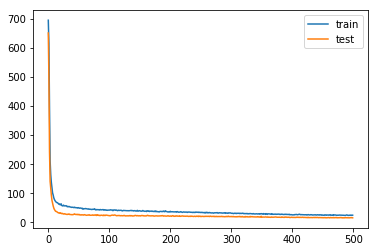

In [36]:
from keras.layers import Dropout
def buildManyToOneModel2(shape):
    model = Sequential()
    model.add(LSTM(64,input_length=shape[1], input_dim=shape[2]))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7))
    model.add(Activation('linear'))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

model = buildManyToOneModel2(X_train.shape)

history=model.fit(X_train, Y_train, epochs=500, batch_size=300, validation_split= 0.1)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#儲存model1
model.save('Dadumodel.h5')
del model

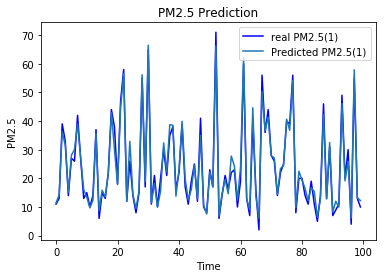

Train 0.4862534569708801
Validation 0.4158125915080527
1.1015586040175183e+39
The R2 score on the Test set is:	0.919
Train Score: 3.67 RMSE
Test Score: 4.18 RMSE
The MSE   on the Test set is: 17.460280517269577
The RMSE  on the Test set is: 4.178550049630802
The MAE   on the Test set is: 2.993505328800159
The MAPE  on the Test set is: 0.030003630005742157
The SMAPE on the Test set is: 0.024694288163773385


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


In [37]:
#讀取model1
model = load_model('Dadumodel.h5')
# 預測
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)

plt.plot(Y_val[0:100,0], color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict[0:100,0], label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# MAPE和SMAPE
def mape(y_true, y_pred): 
    n = len(y_true)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n *100 

def smape(y_true, y_pred):
    n = len(y_true)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n *100

# MSE
print("The MSE   on the Test set is:",metrics.mean_squared_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好
# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用